import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

important functions

In [2]:
def wilson(x1,v1,v2,a12,a21,temp):
    x2=1-x1
    delta12 = (v2/v1)*math.e**(-a12/(8.314*temp))
    delta21 = (v1/v2)*math.e**(-a21/(8.314*temp))
    ln_gamma1 = -1*math.log(x1+x2*delta12)+x2*((delta12/(x1+x2*delta12))-(delta21/(x2+x1*delta21)))
    ln_gamma2 = -1*math.log(x2+x1*delta21)-x1*((delta12/(x1+x2*delta12))-(delta21/(x2+x1*delta21)))
    return math.e**(ln_gamma1), math.e**(ln_gamma2)

def nrtl(x1,b12,b21,alpha,temp):
    x2 = 1-x1
    tau12 = b12/(8.314*temp)
    tau21 = b21/(8.314*temp)
    g12 = math.e**(-1*alpha*tau12)
    g21 = math.e**(-1*alpha*tau21)
    ln_gamma1 = (x2**2)*(tau21*(g21/(x1+x2*g21))**2 + ((g12*tau12)/((x2+x1*g12)**2)))
    ln_gamma2 = (x1**2)*(tau12*(g12/(x2+x1*g12))**2 + ((g21*tau21)/((x1+x2*g21)**2)))
    return math.e**(ln_gamma1), math.e**(ln_gamma2)

def vap_pressure(A,B,C,temp):
    temp = temp - 273.15
    ln_psat = A-B/(temp+C)
    return math.e**(ln_psat)

def boiling_pt(A,B,C,psat):
    return (B/(A-math.log(psat))-C) + 273.15

initializing data

In [ ]:
component1 = input("enter component 1")
component2 = input("enter component 2")
print(component1,component2)
required = ["v1","v2","a12","a21","b12","b21","alpha", "A1","B1","C1","A2","B2","C2"]
values = {}
# for i in required:
#     values[i] = float(input(f"enter value of {i} for your components"))
values = {'v1': 74.05, 'v2': 18.07, 'a12': 1219.5, 'a21':6062.5,'b12': 2642.1, 'b21': 5013.3, 'alpha': 0.5343 ,'A1': 14.3154,  'B1': 2756.22, 'C1': 228.06, 'A2': 16.3872, 'B2': 3885.7,'C2': 230.17}


1 2


In [11]:
print(values)

{'v1': 3.0, 'v2': 4.0, 'a12': 5.0, 'a21': 6.0, 'b12': 7.0, 'b21': 8.0, 'alpha': 5.0, 'A1': 4.0, 'B1': 3.0, 'C1': 3.0, 'A2': 2.0, 'B2': 3.0, 'C2': 4.0}


12.12

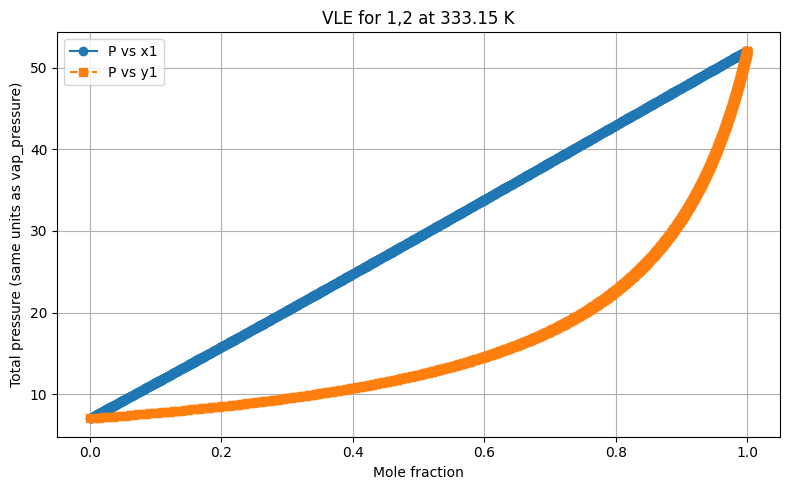

           x1        y1   pressure
0    0.000000  0.000000   7.050687
1    0.001001  0.007099   7.093988
2    0.002002  0.014112   7.137295
3    0.003003  0.021042   7.180607
4    0.004004  0.027890   7.223925
..        ...       ...        ...
995  0.995996  0.999478  51.877789
996  0.996997  0.999609  51.923140
997  0.997998  0.999739  51.968487
998  0.998999  0.999870  52.013830
999  1.000000  1.000000  52.059170

[1000 rows x 3 columns]


In [4]:
temp = 333.15

p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)

x1 = np.linspace(0, 1, num=1000)
gamma1 = [wilson(x, values["v1"], values["v2"], values["a12"], values["a21"], temp)[0] for x in x1]
gamma2 = [wilson(x, values["v1"], values["v2"], values["a12"], values["a21"], temp)[1] for x in x1]

pb = [ x1[i]*gamma1[i]*p1sat + (1-x1[i])*p2sat*gamma2[i] for i in range(len(x1)) ]
y1 = [(x1[i]*p1sat*gamma1[i])/pb[i] for i in range(len(x1))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "pressure":pb})

plt.figure(figsize=(8,5))
plt.plot(x1, pb, marker='o', linestyle='-', label='P vs x1')
plt.plot(y1, pb, marker='s', linestyle='--', label='P vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Total pressure (same units as vap_pressure)')
plt.title(f'VLE for {component1},{component2} at {temp:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.13

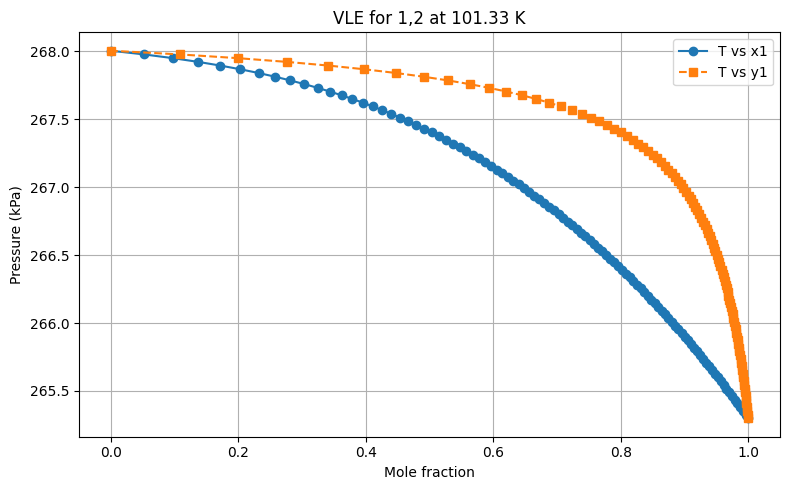

              x1            y1  temperature
0   1.000000e+00  1.000000e+00   265.298634
1   9.958740e-01  9.993681e-01   265.325963
2   9.917139e-01  9.987232e-01   265.353293
3   9.875192e-01  9.980649e-01   265.380622
4   9.832895e-01  9.973929e-01   265.407952
..           ...           ...          ...
95  1.718977e-01  3.413821e-01   267.894936
96  1.368610e-01  2.757491e-01   267.922266
97  9.736714e-02  1.990484e-01   267.949595
98  5.227273e-02  1.084308e-01   267.976925
99  2.907251e-14  6.118823e-14   268.004254

[100 rows x 3 columns]


In [5]:
p = 101.33
t1sat = boiling_pt(values["A1"], values["B1"], values["C1"], p)
t2sat = boiling_pt(values["A2"], values["B2"], values["C2"], p)

temp = np.linspace(t1sat, t2sat, 100)

p1sat = [ vap_pressure(values["A1"], values["B1"], values["C1"], temp[i]) for i in range(len(temp))]
p2sat = [ vap_pressure(values["A2"], values["B2"], values["C2"], temp[i]) for i in range(len(temp))]

for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        x1 = [(p - gamma2 * p2sat[i]) / (gamma1 * p1sat[i] - gamma2 * p2sat[i]) for i in range(len(temp)) ]
    else:
        gamma1 = [wilson(x1[i], values["v1"], values["v2"], values["a12"], values["a21"], temp[i]+273.15)[0] for i in range(len(temp))] 
        gamma2 = [wilson(x1[i], values["v1"], values["v2"], values["a12"], values["a21"], temp[i]+273.15)[1] for i in range(len(temp)) ] 
        x1 = [(p - gamma2[i] * p2sat[i]) / (gamma1[i] * p1sat[i] - gamma2[i] * p2sat[i]) for i in range(len(temp)) ]

y1 = [x1[i]*p1sat[i]*gamma1[i]/p for i in range(len(temp))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "temperature":temp})
plt.figure(figsize=(8,5))
plt.plot(x1, temp, marker='o', linestyle='-', label='T vs x1')
plt.plot(y1, temp, marker='s', linestyle='--', label='T vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Pressure (kPa)')
plt.title(f'VLE for {component1},{component2} at {p:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.14

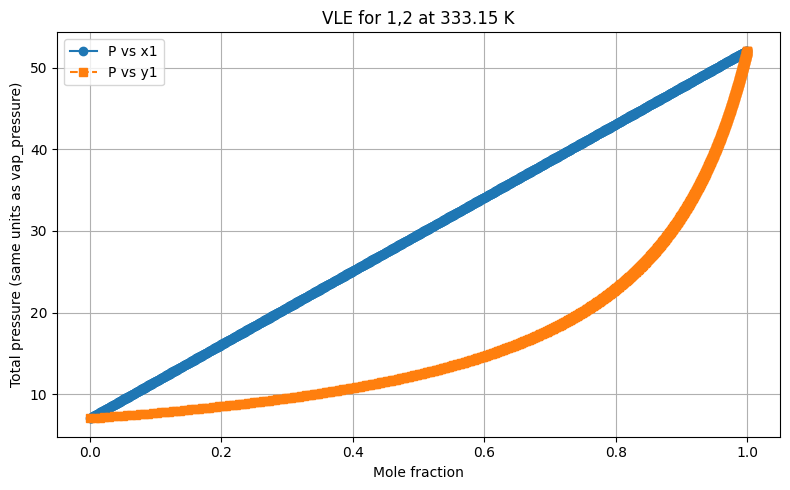

           x1        y1   pressure
0    0.000000  0.000000   7.050687
1    0.001001  0.007383   7.096021
2    0.002002  0.014673   7.141354
3    0.003003  0.021870   7.186686
4    0.004004  0.028977   7.232018
..        ...       ...        ...
995  0.995996  0.999453  51.879111
996  0.996997  0.999590  51.924125
997  0.997998  0.999727  51.969140
998  0.998999  0.999864  52.014154
999  1.000000  1.000000  52.059170

[1000 rows x 3 columns]


In [6]:
temp = 333.15

p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)

x1 = np.linspace(0, 1, num=1000)
gamma1 = [nrtl(x, values["b12"], values["b21"], values["alpha"], temp)[0] for x in x1]
gamma2 = [nrtl(x, values["b12"], values["b21"], values["alpha"], temp)[1] for x in x1]

pb = [ x1[i]*gamma1[i]*p1sat + (1-x1[i])*p2sat*gamma2[i] for i in range(len(x1)) ]
y1 = [(x1[i]*p1sat*gamma1[i])/pb[i] for i in range(len(x1))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "pressure":pb})

plt.figure(figsize=(8,5))
plt.plot(x1, pb, marker='o', linestyle='-', label='P vs x1')
plt.plot(y1, pb, marker='s', linestyle='--', label='P vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Total pressure (same units as vap_pressure)')
plt.title(f'VLE for {component1},{component2} at {temp:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.15

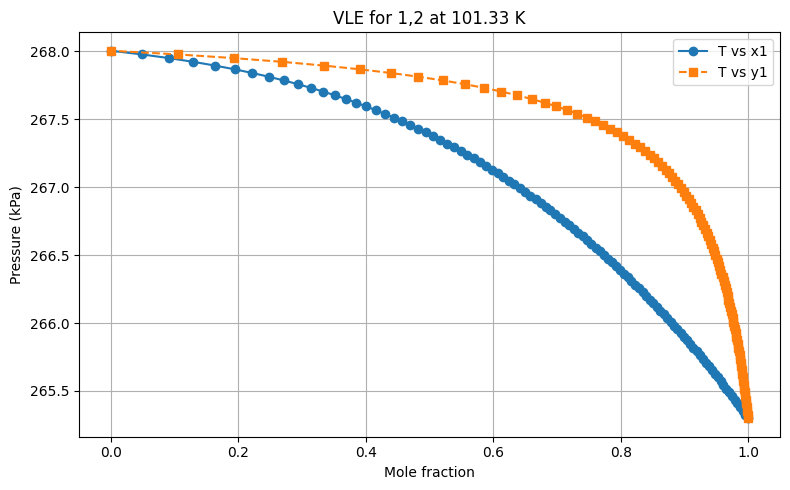

              x1            y1  temperature
0   1.000000e+00  1.000000e+00   265.298634
1   9.958378e-01  9.993327e-01   265.325963
2   9.916395e-01  9.986521e-01   265.353293
3   9.874047e-01  9.979577e-01   265.380622
4   9.831328e-01  9.972491e-01   265.407952
..           ...           ...          ...
95  1.635337e-01  3.340531e-01   267.894936
96  1.296380e-01  2.692228e-01   267.922266
97  9.175857e-02  1.938150e-01   267.949595
98  4.896208e-02  1.052354e-01   267.976925
99  2.703010e-14  5.914582e-14   268.004254

[100 rows x 3 columns]


In [7]:
p = 101.33
t1sat = boiling_pt(values["A1"], values["B1"], values["C1"], p)
t2sat = boiling_pt(values["A2"], values["B2"], values["C2"], p)

temp = np.linspace(t1sat, t2sat, 100)

p1sat = [ vap_pressure(values["A1"], values["B1"], values["C1"], temp[i]) for i in range(len(temp))]
p2sat = [ vap_pressure(values["A2"], values["B2"], values["C2"], temp[i]) for i in range(len(temp))]

for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        x1 = [(p - gamma2 * p2sat[i]) / (gamma1 * p1sat[i] - gamma2 * p2sat[i]) for i in range(len(temp)) ]
    else:
        gamma1 = [nrtl(x1[i], values["b12"], values["b21"], values["alpha"], temp[i]+273.15)[0] for i in range(len(temp))] 
        gamma2 = [nrtl(x1[i], values["b12"], values["b21"], values["alpha"], temp[i]+273.15)[1] for i in range(len(temp)) ] 
        x1 = [(p - gamma2[i] * p2sat[i]) / (gamma1[i] * p1sat[i] - gamma2[i] * p2sat[i]) for i in range(len(temp)) ]

y1 = [x1[i]*p1sat[i]*gamma1[i]/p for i in range(len(temp))]
result = pd.DataFrame({"x1":x1, "y1":y1 , "temperature":temp})
plt.figure(figsize=(8,5))
plt.plot(x1, temp, marker='o', linestyle='-', label='T vs x1')
plt.plot(y1, temp, marker='s', linestyle='--', label='T vs y1')
plt.xlabel('Mole fraction')
plt.ylabel('Pressure (kPa)')
plt.title(f'VLE for {component1},{component2} at {p:.2f} K')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(result)

12.16

In [8]:
temp = 333.15
# (a)
x1 = 0.3
p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)
gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], temp)
pb = x1*p1sat*gamma1 + (1-x1)*p2sat*gamma2
print(f"bubble pressure for (a) is {pb} kelvin")

# (b)
y1 = 0.3
for i in range(10):
    if i==0:
        gamma2 = gamma1 = 1
        p_dew = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*p_dew)/(p1sat*gamma1)
    else:
        gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], temp)
        p_dew = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*p_dew)/(p1sat*gamma1)
print(f"dew pressure for (b) is {p_dew} kelvin")
# (c)
t_flash = temp
p_flash = (pb + p_dew) / 2
p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], t_flash)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], t_flash)
z1 = 0.3

for i in range(10):
    gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], t_flash) if i==0 else (1,1)
    k1, k2 = gamma1*p1sat/p_flash, gamma2*p2sat/p_flash
    for v in np.linspace(0,1,10):
        summation = z1*k1/(1+v*(k1-1)) + (1-z1)*k2/(1+v*(k2-1))
        if abs(summation-1) < 0.01:
            print("breaking value of flash v ->", v)
    y1 = x1*k1/(1+v*(k1-1))
    x1 = y1/k1

bubble pressure for (a) is 20.25187345469712 kelvin
dew pressure for (b) is 9.502555402826669 kelvin
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0
breaking value of flash v -> 1.0


12.17

In [9]:
temp = 333.15
# (a)
x1 = 0.3
p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)
gamma1, gamma2 = nrtl(x1, values["b12"], values["b21"], values["alpha"], temp)
pb = x1*p1sat*gamma1 + (1-x1)*p2sat*gamma2

# (b)
y1 = 0.3
for i in range(100):
    if i==0:
        gamma2 = gamma1 = 1
        p_dew = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*p_dew)/(p1sat*gamma1)
    else:
        gamma1, gamma2 = nrtl(x1, values["b12"], values["b21"], values["alpha"], temp)
        p_dew = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))
        x1 = (y1*p_dew)/(p1sat*gamma1)

# (c)
t_flash = temp
p_flash = (pb + p_dew) / 2
p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], t_flash)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], t_flash)
gamma1, gamma2 = nrtl(x1, values["b12"], values["b21"], values["alpha"], t_flash)
z1 = 0.3
k1, k2 = p1sat/p_flash, p2sat/p_flash

for v in np.linspace(0,1,10000):
    summation = gamma1*x1*k1/(1+v*(k1-1)) + gamma2*(1-x1)*k2/(1+v*(k2-1))
    if abs(summation-1) < 0.0001:
        print("breaking", v)
        break

breaking 0.9996999699969997


12.18

In [10]:
p = 101.33
# (a)
x1 = 0.3
t1sat = boiling_pt(values["A1"], values["B1"], values["C1"], p)
t2sat = boiling_pt(values["A2"], values["B2"], values["C2"], p)
t_avg = 0.5*(t1sat+t2sat)
temp = t_avg
temp_old = 0

while abs(temp-temp_old) > 0.001:
    p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
    p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)

    gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], temp)

    relative_volatility = p1sat/p2sat
    p1sat = p*(x1*gamma1 + (1-x1)*gamma2/relative_volatility)

    temp_old = temp
    temp = boiling_pt(values["A1"], values["B1"], values["C1"], p1sat)
tb = temp
print(f"bubble temperature for (a) is {temp} kelvin")

# (b)
y1 = 0.3
t1sat = boiling_pt(values["A1"], values["B1"], values["C1"], p)
t2sat = boiling_pt(values["A2"], values["B2"], values["C2"], p)
t_avg = 0.5*(t1sat+t2sat)
temp = t_avg
temp_old = 0
gamma1, gamma2 = 1, 1
while abs(temp-temp_old) > 0.001:
    p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], temp)
    p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], temp)

    p_dew = 1/(y1/(gamma1*p1sat) + (1-y1)/(gamma2*p2sat))

    x1 = y1*p_dew/(p1sat*gamma1)
    x2 = 1-x1

    gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], temp)

    relative_volatility = p1sat/p2sat
    p1sat = p*(y1/gamma1 + ((1-y1)*relative_volatility)/gamma2)

    temp_old = temp
    temp = boiling_pt(values["A1"], values["B1"], values["C1"], p1sat)
td = temp
print(f"dew temperature for (b) is {temp} kelvin")

# (c)
t_flash = 0.5*(tb+td)
p_flash = p
p1sat = vap_pressure(values["A1"], values["B1"], values["C1"], t_flash)
p2sat = vap_pressure(values["A2"], values["B2"], values["C2"], t_flash)
gamma1, gamma2 = wilson(x1, values["v1"], values["v2"], values["a12"], values["a21"], t_flash)
z1 = 0.3
k1, k2 = p1sat/p_flash, p2sat/p_flash

for v in np.linspace(0,1,10000):
    summation = gamma1*x1*k1/(1+v*(k1-1)) + gamma2*(1-x1)*k2/(1+v*(k2-1))
    if abs(summation-1) < 0.0001:
        print("breaking", v)
        break

bubble temperature for (a) is 279.57976092173783 kelvin


KeyboardInterrupt: 